In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [2]:
labels = {
    'ours-eq': 'MMD-B-Fair (Eq)',
    'ours-eq9': 'MMD-B-Fair (Eq)',
    'eq-t0': r'MMD-B-Fair (Eq)[$\lambda_t=0$]',
    'eq-cls0': r'MMD-B-Fair (Eq)[$\lambda_{cls}=0$]',
    'ours-dp': 'MMD-B-Fair (DP)',
    'ours-dp9': 'MMD-B-Fair (DP)',
    'dp-t0': r'MMD-B-Fair (DP)[$\lambda_t=0$]',
    'dp-cls0': r'MMD-B-Fair (DP)[$\lambda_{cls}=0$]',
    'mmd-dp': r'$\widehat{MMD}_U^2 / \sqrt{V_m}, [\lambda_t=0]$',
    'mmd-eq': r'$\widehat{MMD}_U^2 / \sqrt{V_m}, [\lambda_t=0]$',
    'sipm': 'sIPM',
    'fcrl': 'FCRL',
    'cfair': 'CFair',
    'laftr': 'LAFTR',
    'unfair': 'Unfair'
}
markers = {
    'ours-eq': '^',
    'ours-eq9': '^',
    'eq-t0': 'o',
    'eq-cls0': '^',
    'ours-dp': 'v',
    'ours-dp9': 'v',
    'dp-t0': ',',
    'dp-cls0': 'v',
    'mmd-dp': 'x',
    'mmd-eq': 'p',
    'sipm': 'o',
    'fcrl': 'x',
    'cfair': '1',
    'laftr': '*',
    'unfair': 'p'
}
colors = {
    'ours-eq': 'b',
    'ours-eq9': 'b',
    'eq-t0': 'C2',
    'eq-cls0': 'g',
    'ours-dp': 'r',
    'ours-dp9': 'r',
    'dp-t0': 'C1',
    'dp-cls0': 'g',
    'mmd-dp': 'c',
    'mmd-eq': 'c',
    'sipm': 'm',
    'fcrl': 'g',
    'cfair': 'c',
    'laftr': 'k',
    'unfair': 'C7'
}
mlabels = {
    'del_dp': r'$\bf{A.}$ Demographic Parity Gap',
    'del_eo': r'$\bf{B.}$ Equalized Odds Gap',
    'dp': 'Demographic Parity',
    'eq_odds': 'Equalized Odds'
}
ylabels = {
    'del_dp': r'$\Delta_{DP}$',
    'del_eo': r'$\Delta_{EO}$',
    'dp': 'DP',
    'eq_odds': 'EO'
}

In [3]:
def plot_tradeoff(results, outname, optimal=None):
    fig, ax = plt.subplots(ncols=2, figsize=(19, 6))
    algos = [*results.keys()]
    for algo in algos:
        groups = results[algo].groupby(['lambda'])
        means = groups.mean()
        lambdas = means.index.to_numpy()
        acc = means['acc-score'].to_numpy()
        sorted_idx = np.argsort(lambdas)
        # for ax_idx, metric in enumerate(['lambdas-score']):
        # for ax_idx, metric in enumerate(['del_dp', 'del_eo']):
        for ax_idx, metric in enumerate(['dp', 'eq_odds']):
            fairness = means[metric].to_numpy()
            if algo != 'unfair':
                # auc_score = auc(lambdas[sorted_idx], fairness[sorted_idx])
                # label = '{}: {:.3f}'.format(labels[algo], auc_score)
                ax[ax_idx].plot(acc[sorted_idx], fairness[sorted_idx], label=labels[algo], c=colors[algo], marker='o')
                # ax[ax_idx].plot(acc[sorted_idx], fairness[sorted_idx], label=labels[algo],  marker='o')
            else:
                label = 'Unfair'
                ax[ax_idx].scatter(acc[sorted_idx], fairness[sorted_idx], label=label, c='C7', marker='p', s=200)
    
    if optimal is not None:
        ax[0].axvline(x=np.mean(optimal['acc-score']), linestyle='--', c='g')
        ax[1].axvline(x=np.mean(optimal['acc-score']), linestyle='--', c='g')

        ax[0].axhline(y=np.mean(optimal['del_dp']), linestyle='--', c='g')
        ax[1].axhline(y=np.mean(optimal['del_eo']), linestyle='--', c='g')

        ax[0].scatter(np.mean(optimal['acc-score']), np.mean(optimal['del_dp']), marker='p', c='g', label='Optimal')
        ax[1].scatter(np.mean(optimal['acc-score']), np.mean(optimal['del_eo']), marker='p', c='g', label='Optimal')

    # ax.set_ylabel('Accuracy')
    ax[0].set_ylabel(f'{ylabels["dp"]}')
    ax[1].set_ylabel(f'{ylabels["eq_odds"]}')

    # ax.set_xlabel(r'Regularization strength $\lambda_s$')
    ax[0].set_xlabel('Accuracy')
    ax[1].set_xlabel('Accuracy')

    # ax[0].set_xscale('log')
    # ax[1].set_xscale('log')

    ax[0].set_title(mlabels['dp'])
    ax[1].set_title(mlabels['eq_odds'])

    ax[0].legend(loc='lower left')
    ax[1].legend(loc='lower left')

    ax[0].grid(visible=True, which='both')
    ax[1].grid(visible=True, which='both')

    plt.tight_layout()
    plt.savefig(outname)
    plt.show()

In [4]:
def scatter_tradeoff(results, outname):
    fig, ax = plt.subplots(ncols=2, figsize=(19, 6))
    algos = [*results.keys()]
    for algo in algos:
        for ax_idx, metric in enumerate(['dp', 'eq_odds']):
            fairness = results[algo][metric].to_numpy()
            acc = results[algo]['acc-score'].to_numpy()
            f1 = (2 / ((1/acc) + (1/(fairness)))).max()
            label = '{}: {:.3f}'.format(labels[algo], f1)
            ax[ax_idx].scatter(acc, fairness, c=colors[algo], label=label, marker=markers[algo])

    # ax[0].set_ylabel(ylabels['dp'])
    # ax[1].set_ylabel(ylabels['eq_odds'])

    ax[0].set_xlabel('Accuracy')
    ax[1].set_xlabel('Accuracy')
        
    ax[0].set_title(mlabels['dp'])
    ax[1].set_title(mlabels['eq_odds'])

    ax[0].legend(loc='lower left', title='maximal "F1"')
    ax[1].legend(loc='lower left', title='maximal "F1"')

    ax[0].grid(visible=True, which='both')
    ax[1].grid(visible=True, which='both')

    plt.tight_layout()
    plt.savefig(outname)
    plt.show()

### Compas

In [5]:
results = {}
# results['ours-eq'] = pd.read_csv('../outputs/eq_compas_test.csv', index_col=0)
# results['ours-dp'] = pd.read_csv('../outputs/dp_compas_test.csv', index_col=0)
results['sipm'] = pd.read_csv('../outputs/sipm_compas_test.csv', index_col=0)
# results['fcrl'] = pd.read_csv('../outputs/fcrl_compas_test.csv', index_col=0)
results['cfair'] = pd.read_csv('../outputs/cfair_compas_test.csv', index_col=0)
results['laftr'] = pd.read_csv('../outputs/laftr_compas_test.csv', index_col=0)

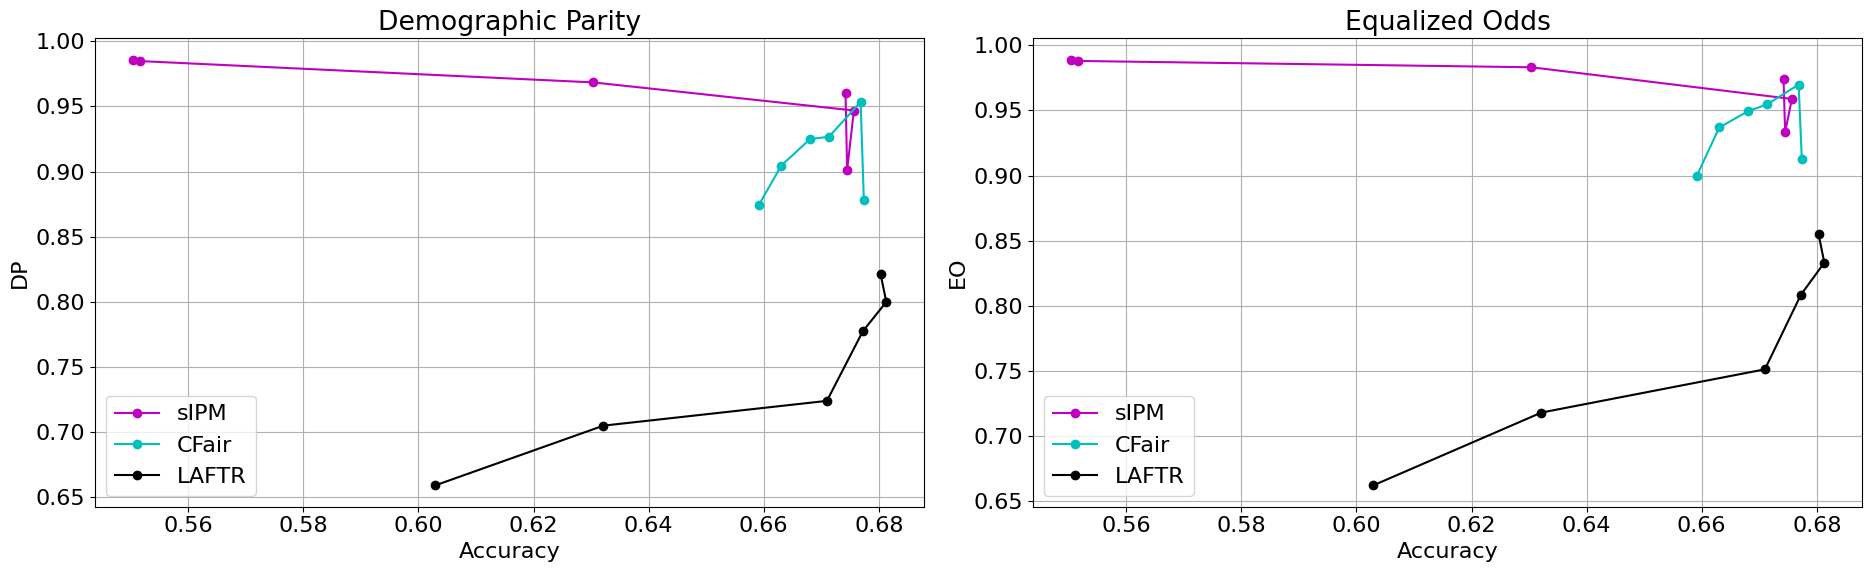

In [8]:
plot_tradeoff(results, '../figures/compas_tradeoff.pdf')

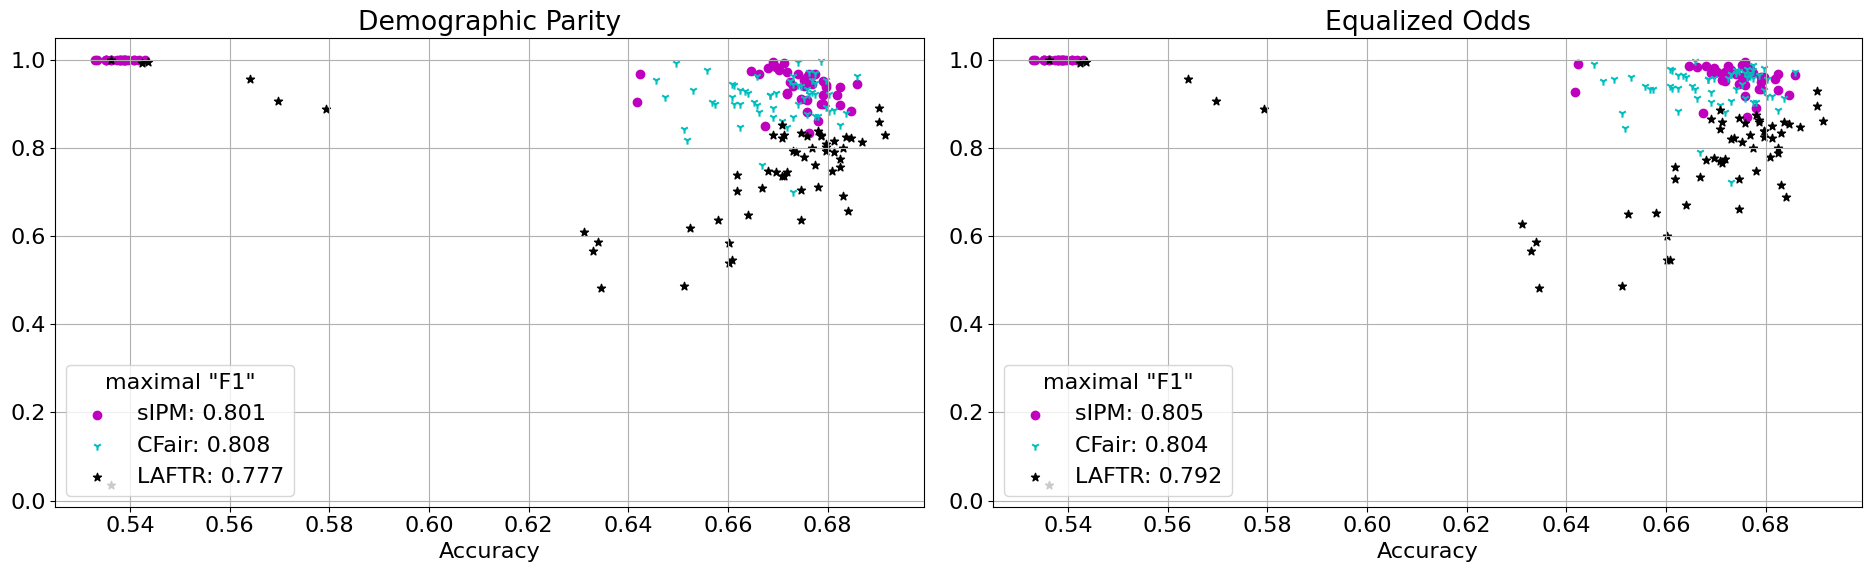

In [7]:
scatter_tradeoff(results, '../figures/compas_scatter.pdf')

### Health Charlson

In [34]:
results = {}
results['ours-eq'] = pd.read_csv('../outputs/eq_health_test.csv', index_col=0)
# results['ours-eq9'] = pd.read_csv('../outputs/eq9_health_test.csv', index_col=0)
# results['eq-cls0'] = pd.read_csv('../outputs/eq_health_cls0_test.csv', index_col=0)
# results['eq-t0'] = pd.read_csv('../outputs/eq_health_t0_test.csv', index_col=0)
# results['mmd-eq'] = pd.read_csv('../outputs/mmd_eq_health_test.csv', index_col=0)
results['ours-dp'] = pd.read_csv('../outputs/dp_health_test.csv', index_col=0)
# results['ours-dp9'] = pd.read_csv('../outputs/dp9_health_test.csv', index_col=0)
# results['dp-cls0'] = pd.read_csv('../outputs/dp_health_cls0_test.csv', index_col=0)
# results['dp-t0'] = pd.read_csv('../outputs/dp_health_t0_test.csv', index_col=0)
# results['mmd-dp'] = pd.read_csv('../outputs/mmd_dp_health_test.csv', index_col=0)
results['sipm'] = pd.read_csv('../outputs/sipm_health_test.csv', index_col=0)
# results['fcrl'] = pd.read_csv('../outputs/fcrl_health_test.csv', index_col=0)
results['cfair'] = pd.read_csv('../outputs/cfair_health_test.csv', index_col=0)
results['laftr'] = pd.read_csv('../outputs/laftr_health_test.csv', index_col=0)
# results['unfair'] = pd.read_csv('./outputs/unfair_health_test.csv', index_col=0)

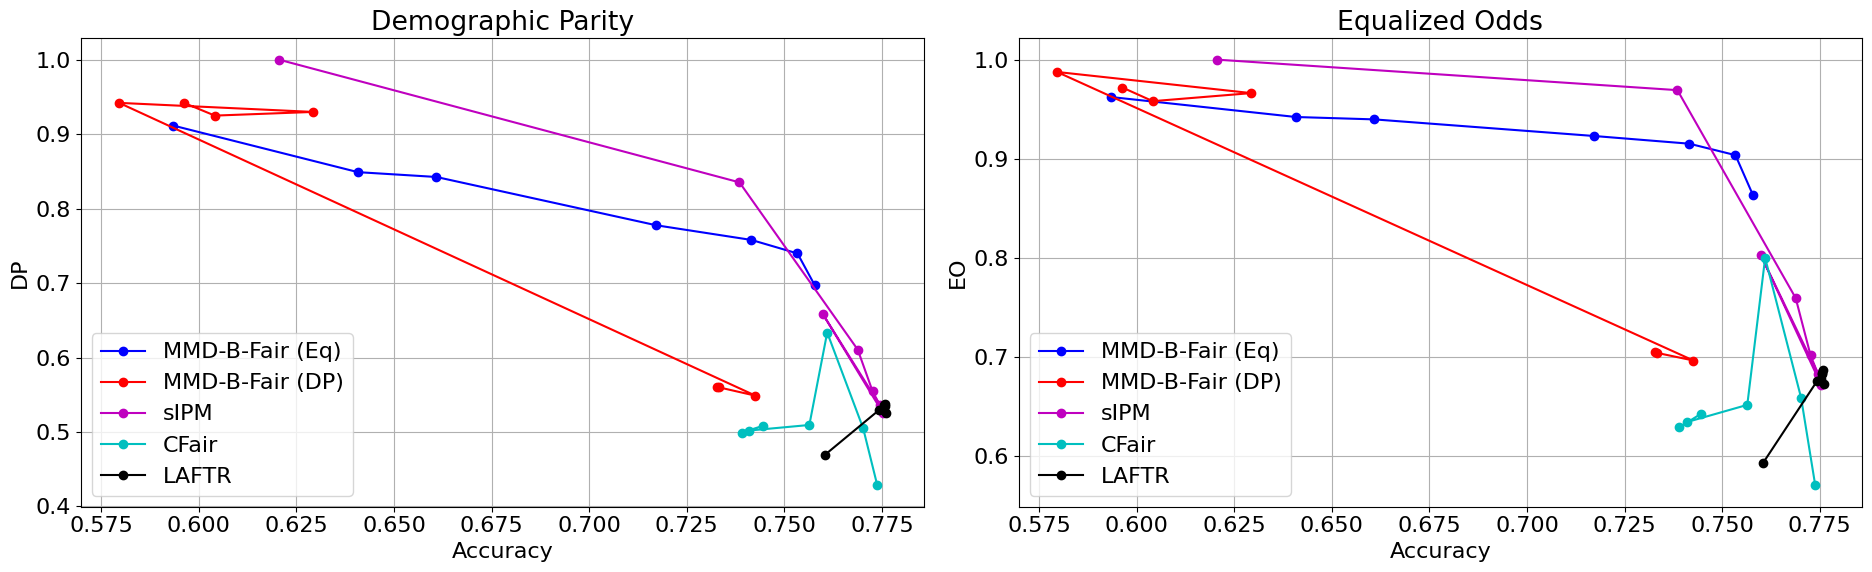

In [35]:
plot_tradeoff(results, '../figures/health_tradeoff.pdf')

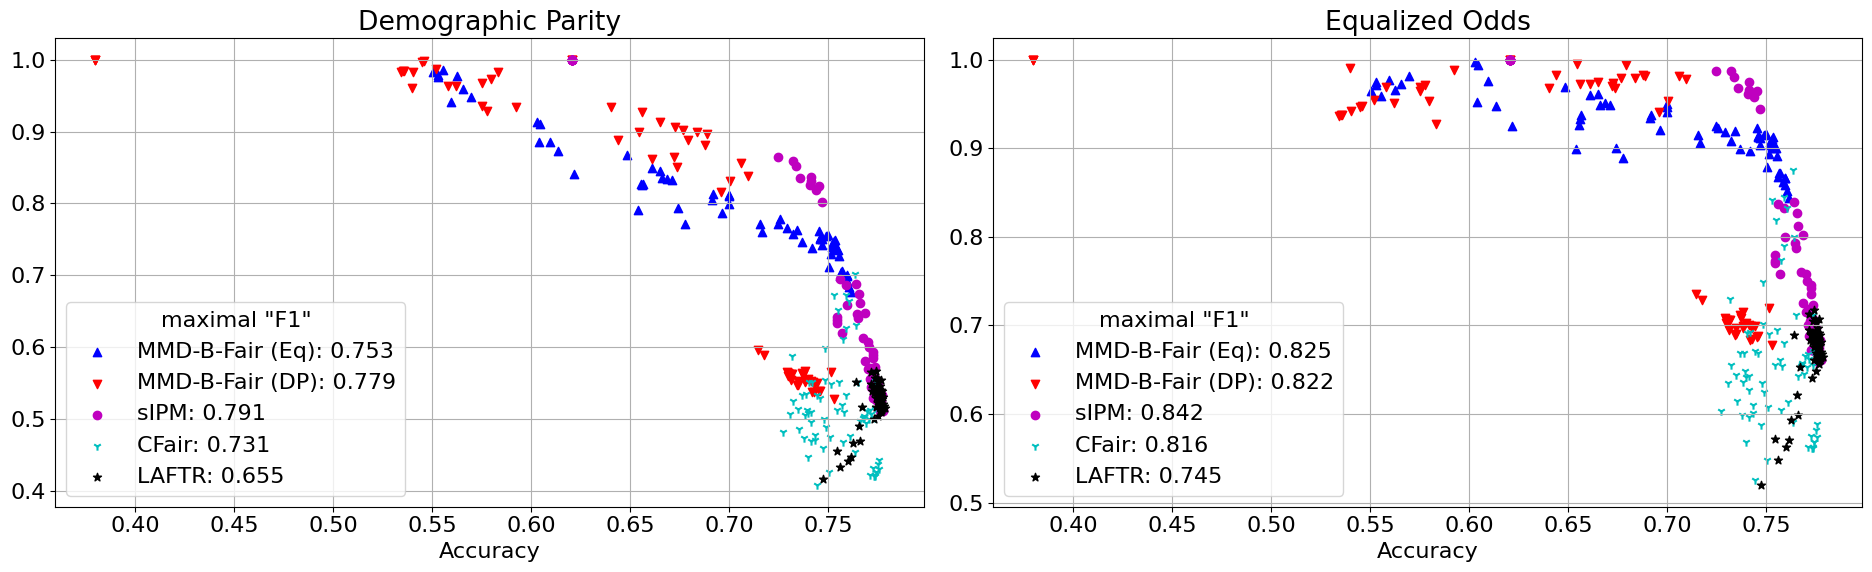

In [29]:
scatter_tradeoff(results, '../figures/health_scatter.pdf')

### Adult

In [36]:
results = {}
results['ours-eq'] = pd.read_csv('../outputs/eq_adult_test.csv', index_col=0)
# results['ours-eq'] = pd.read_csv('../outputs/eq_adult_new_test.csv', index_col=0)
# results['eq-cls0'] = pd.read_csv('../outputs/eq_adult_new_cls0_test.csv', index_col=0)
# results['eq-t0'] = pd.read_csv('../outputs/eq_adult_new_t0_test.csv', index_col=0)
# results['mmd-eq'] = pd.read_csv('../outputs/mmd_eq_adult_new_test.csv', index_col=0)

results['ours-dp'] = pd.read_csv('../outputs/dp_adult_test.csv', index_col=0)
# results['ours-dp'] = pd.read_csv('../outputs/dp_adult_new_test.csv', index_col=0)
# results['dp-cls0'] = pd.read_csv('../outputs/dp_adult_new_cls0_test.csv', index_col=0)
# results['dp-t0'] = pd.read_csv('../outputs/dp_adult_new_t0_test.csv', index_col=0)
# results['mmd-dp'] = pd.read_csv('../outputs/mmd_dp_adult_new_test.csv', index_col=0)

results['sipm'] = pd.read_csv('../outputs/sipm_adult_test.csv', index_col=0)
# results['fcrl'] = pd.read_csv('../outputs/fcrl_adult_new_test.csv', index_col=0)
# results['cfair'] = pd.read_csv('./outputs/cfair_adult_test.csv', index_col=0)
results['cfair'] = pd.read_csv('../outputs/cfair_og_adult_test.csv', index_col=0)
results['laftr'] = pd.read_csv('../outputs/laftr_adult_test.csv', index_col=0)
# results['unfair'] = pd.read_csv('../outputs/unfair_adult_test.csv', index_col=0)

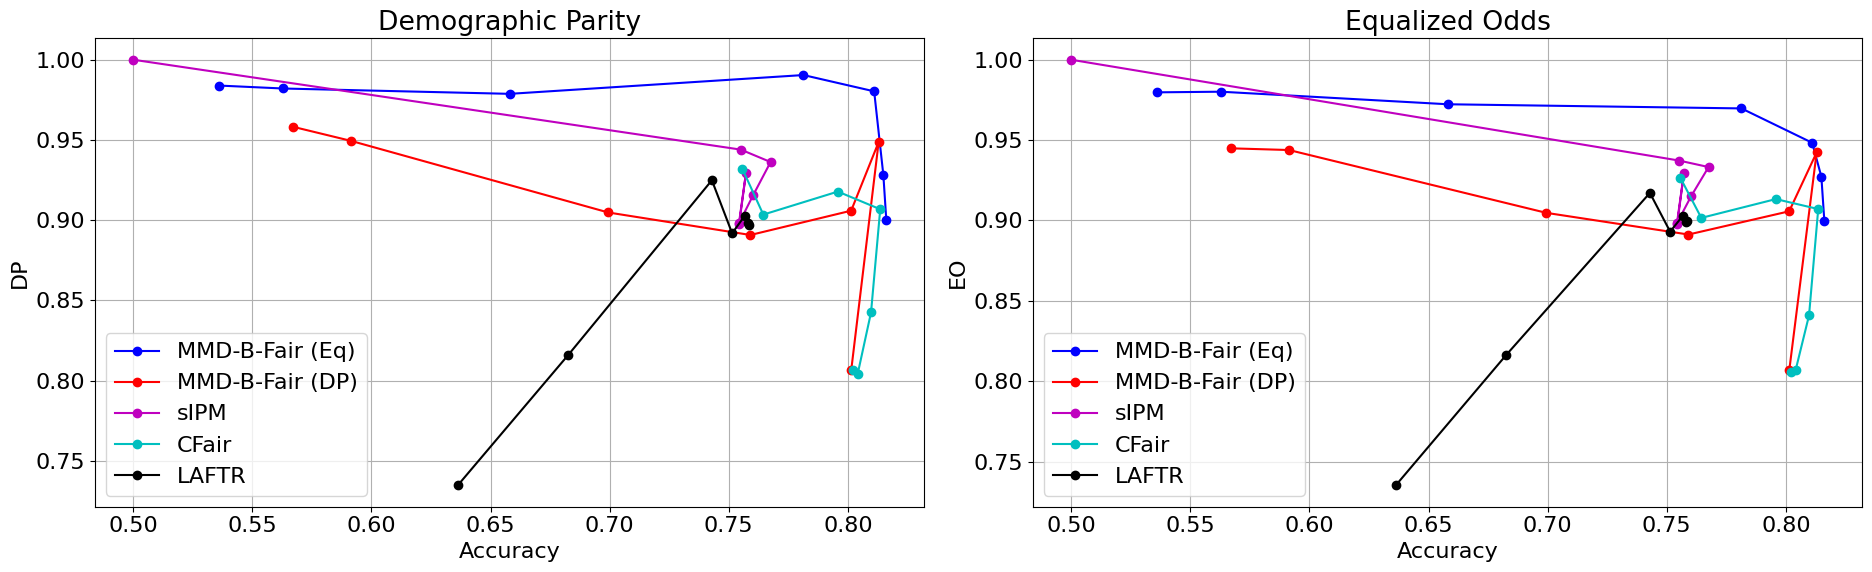

In [37]:
plot_tradeoff(results, '../figures/adult_tradeoff.pdf')

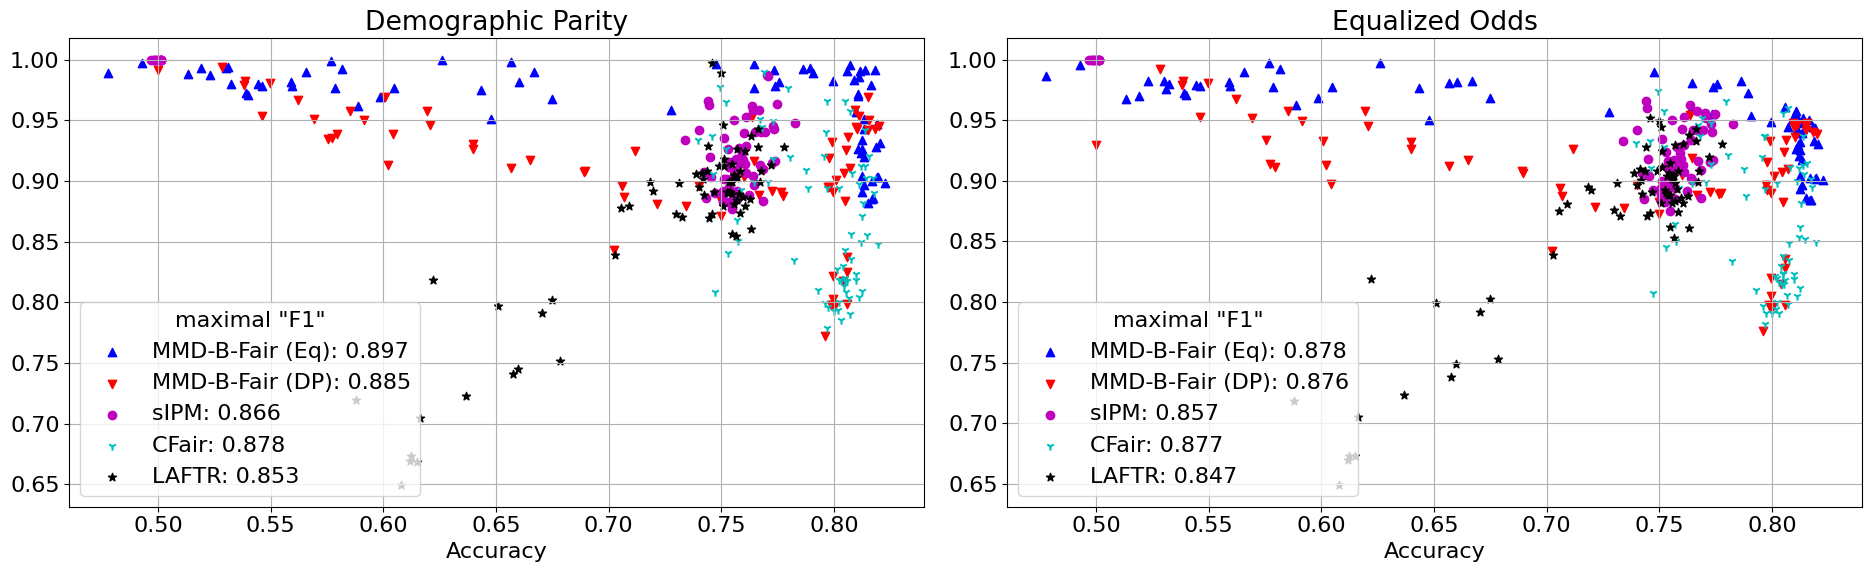

In [32]:
scatter_tradeoff(results, '../figures/adult_scatter.pdf')

### Waterbirds

In [8]:
results = {}
results['ours-eq'] = pd.read_csv('../outputs/eq_waterbirds_test.csv', index_col=0)
results['eq-t0'] = pd.read_csv('../outputs/eq_t0_waterbirds.csv', index_col=0)

results['ours-dp'] = pd.read_csv('../outputs/dp_waterbirds_test.csv', index_col=0)
results['dp-t0'] = pd.read_csv('../outputs/dp_t0_waterbirds.csv', index_col=0)


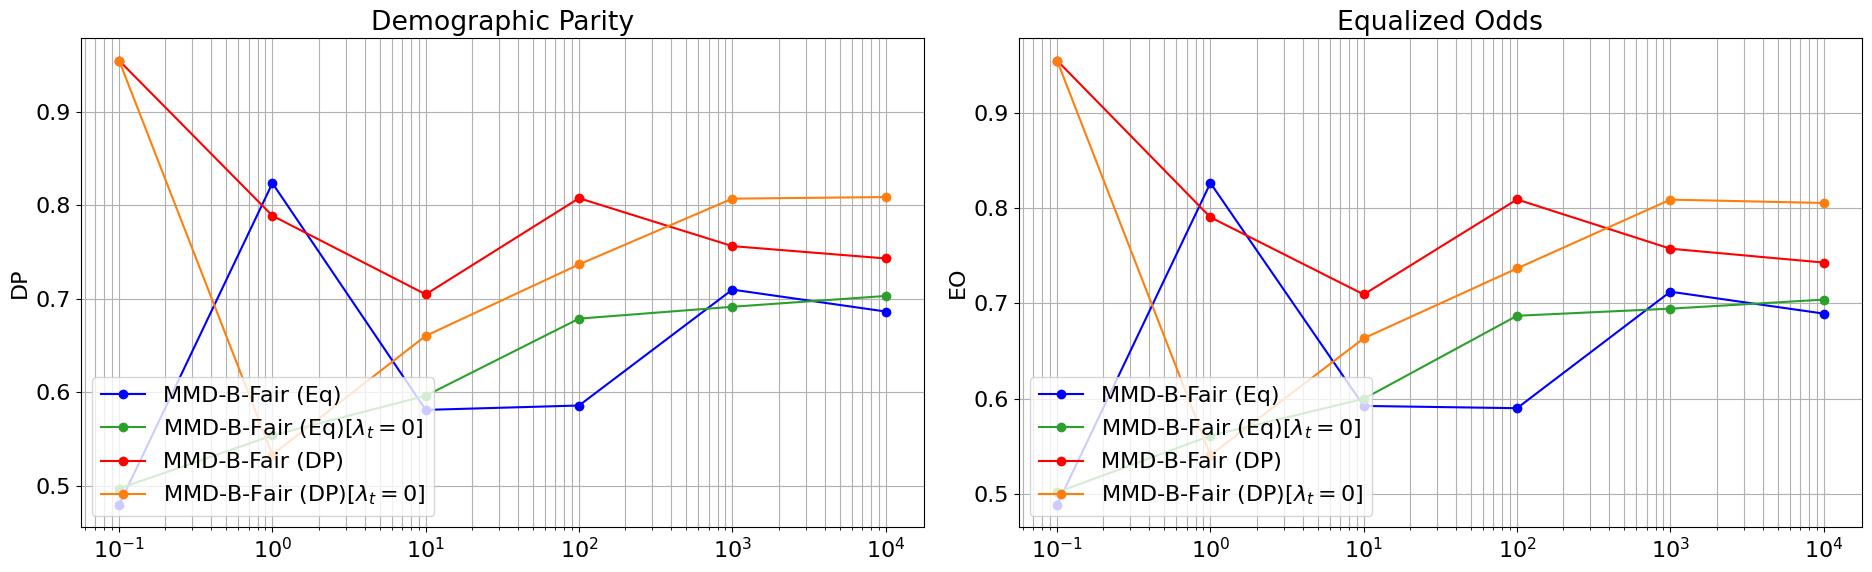

In [21]:
plot_tradeoff(results, '../figures/waterbirds_tradeoff.pdf')

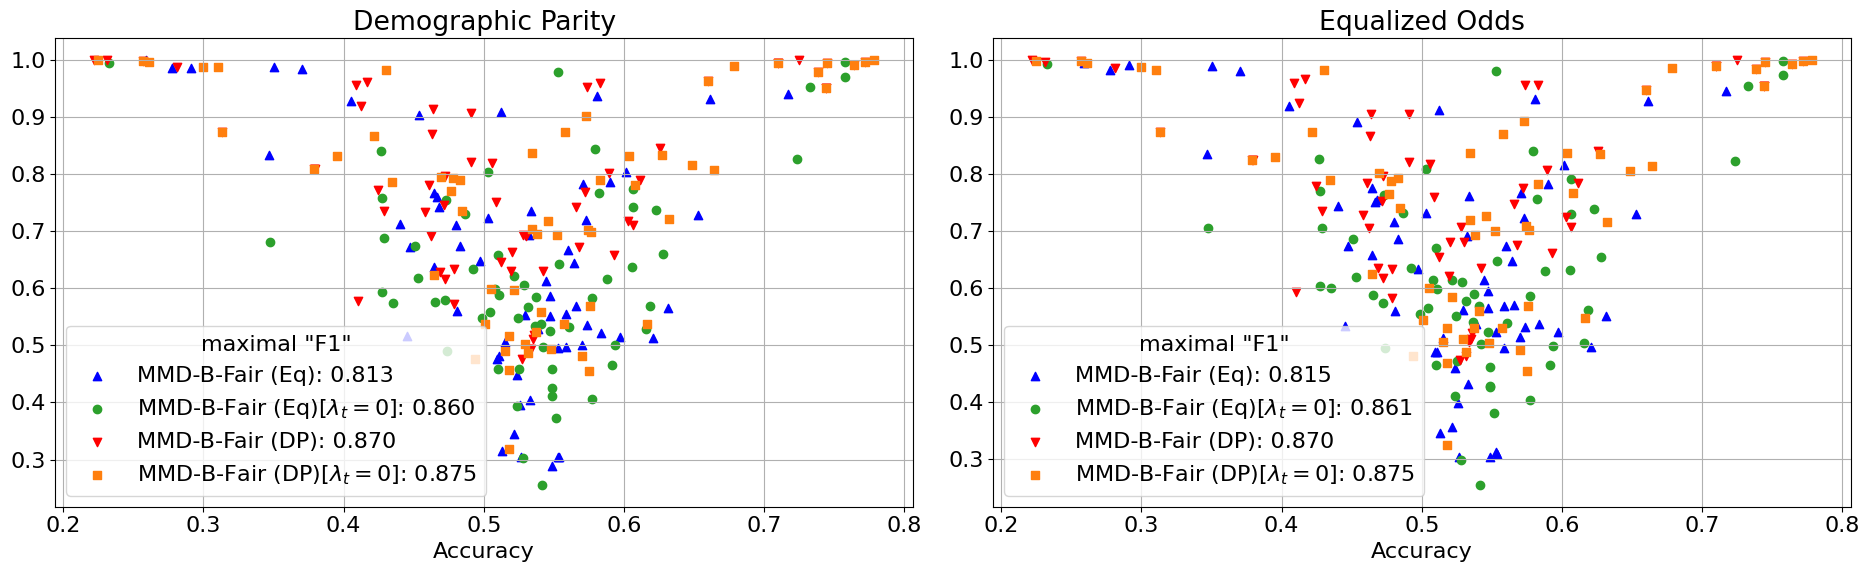

In [13]:
scatter_tradeoff(results, '../figures/waterbirds_scatter.pdf')

In [15]:
def plot_scls(results, outname):
    plt.figure(figsize=(19, 6))
    algos = [*results.keys()]
    for algo in algos:
        groups = results[algo].groupby(['lambda'])
        means = groups.mean()
        stds = groups.std()
        lambdas = means.index.to_numpy()
        acc = means['acc-score'].to_numpy()
        acc_stds = stds['acc-score'].to_numpy()
        sorted_idx = np.argsort(lambdas)

        plt.plot(lambdas, acc, label=labels[algo], c=colors[algo], marker='o')
        plt.fill_between(lambdas, acc - acc_stds , acc + acc_stds,color=colors[algo],alpha=0.2)

    plt.xlim(left=0.1)
    plt.ylim(bottom=0.5)
    plt.xscale('log')
    plt.grid(which='major')
    plt.legend(loc='upper right')

    plt.ylabel('Sensitive Label Accuracy')
    plt.xlabel(r'regularization strength $\lambda_s$')

    plt.savefig(outname)
    plt.show()

### Health SCLS

In [21]:
results = {}
results['ours-eq'] = pd.read_csv('../outputs/eq_health_scls.csv', index_col=0)
results['ours-dp'] = pd.read_csv('../outputs/dp_health_scls.csv', index_col=0)
results['sipm'] = pd.read_csv('../outputs/sipm_health_scls.csv', index_col=0)
results['cfair'] = pd.read_csv('../outputs/cfair_health_scls.csv', index_col=0)

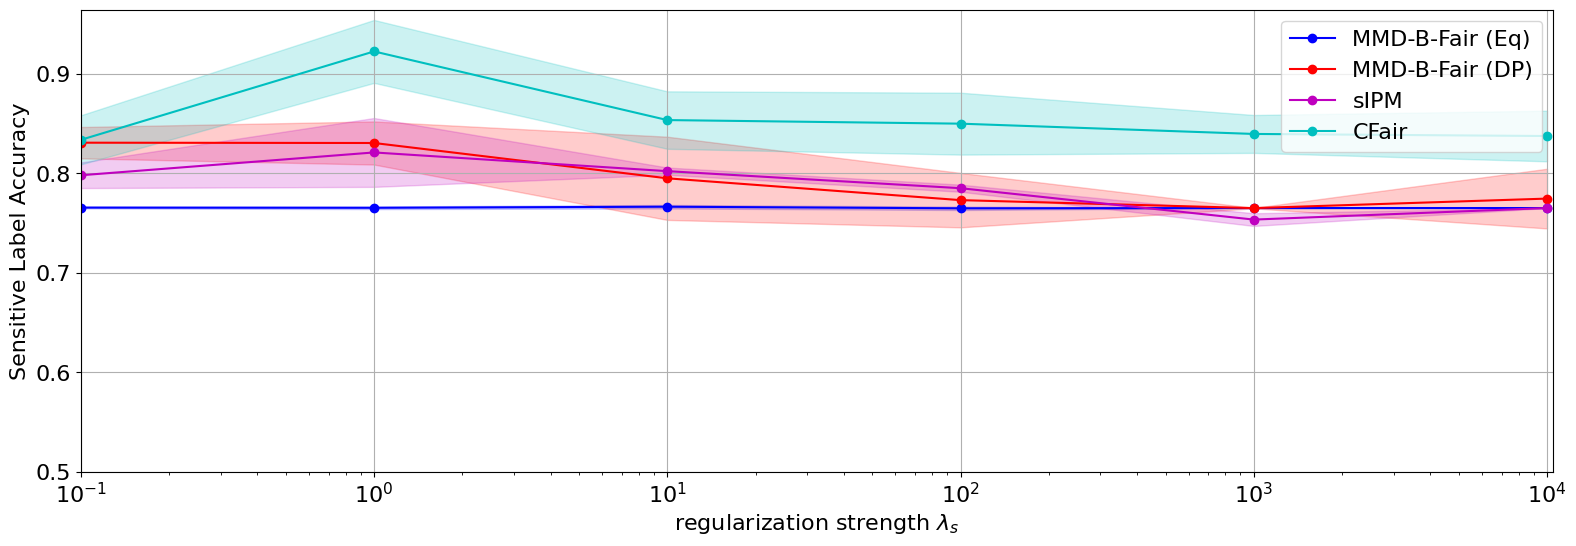

In [22]:
plot_scls(results, '../figures/health_scls.pdf')

### Adult SCLS

In [ ]:
results = {}

### Health Transfer